# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [1]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/Lisabyy/visualization/refs/heads/main/assignment/data/college_completion.csv')
df = df[['level', 'aid_value', 'control', 'grad_100_value']]

#2
print(df.shape)
print(df.head())

(3798, 4)
    level  aid_value                 control  grad_100_value
0  4-year     7142.0                  Public            10.0
1  4-year     6088.0                  Public            29.4
2  4-year     2540.0  Private not-for-profit             0.0
3  4-year     6647.0                  Public            16.5
4  4-year     7256.0                  Public             8.8


In [2]:
#3
ct = pd.crosstab(df['control'], df['level'])
print(ct)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


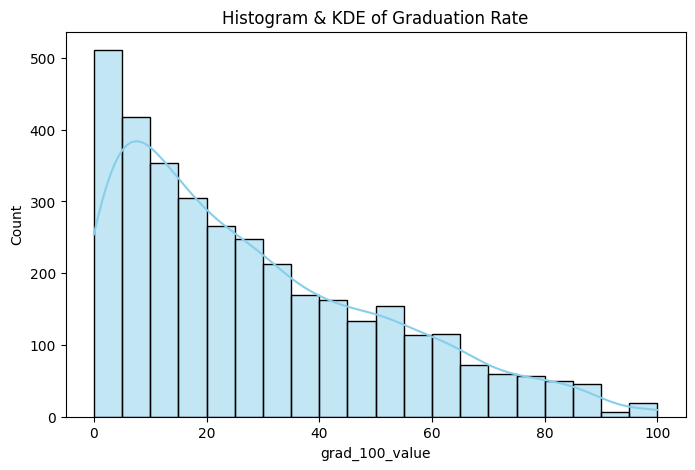

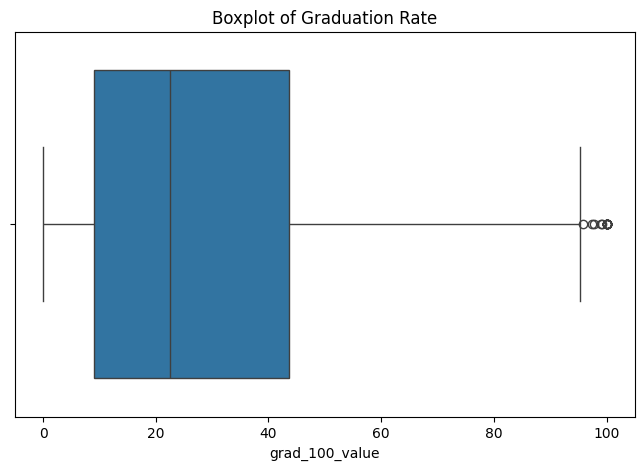

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [4]:
#4
plt.figure(figsize=(8,5))
sns.histplot(df['grad_100_value'], bins=20, kde=True, color='skyblue')
plt.title("Histogram & KDE of Graduation Rate")
plt.xlabel("grad_100_value")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['grad_100_value'])
plt.title("Boxplot of Graduation Rate")
plt.show()

print(df['grad_100_value'].describe())

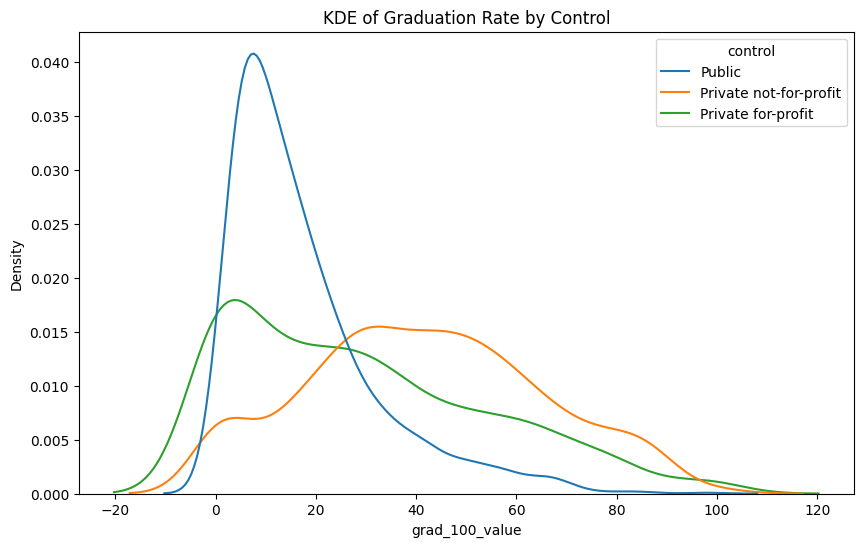

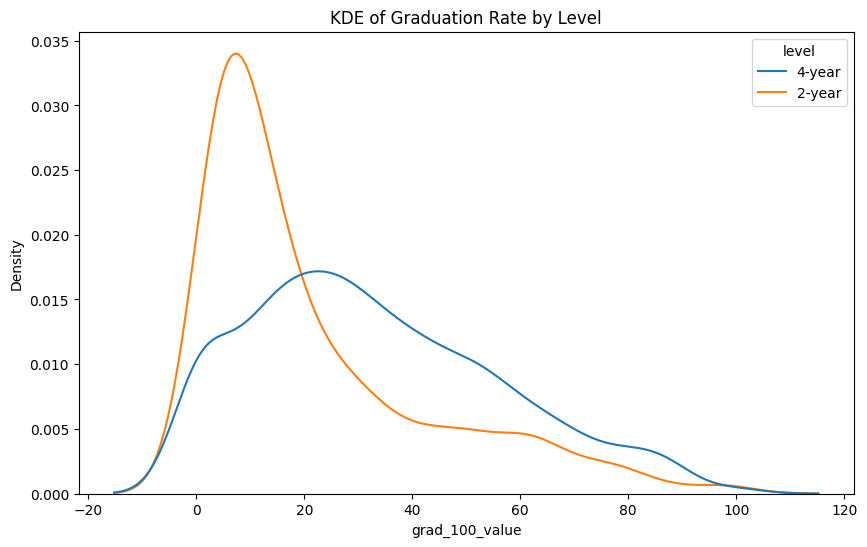

                                count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                    

In [6]:
#5
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', common_norm=False)
plt.title("KDE of Graduation Rate by Control")
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', common_norm=False)
plt.title("KDE of Graduation Rate by Level")
plt.show()

print(df.groupby(['control','level'])['grad_100_value'].describe())

From the plots above, 4-year private not-for-profit institutions appear to have the highest graduation rates.

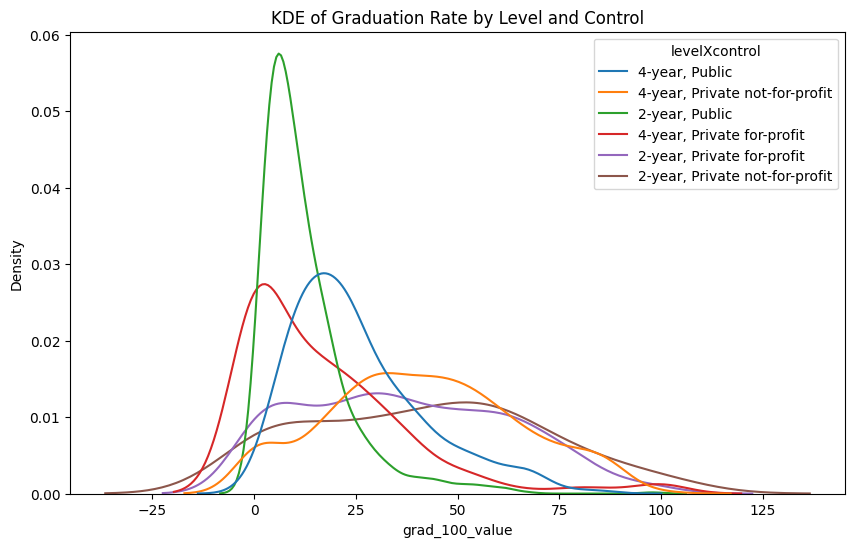

In [7]:
#6
df['levelXcontrol'] = df['level'] + ', ' + df['control']
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', common_norm=False)
plt.title("KDE of Graduation Rate by Level and Control")
plt.show()

From the plot above, 2-year private not-for-profit seems to have the higher graduation rates.

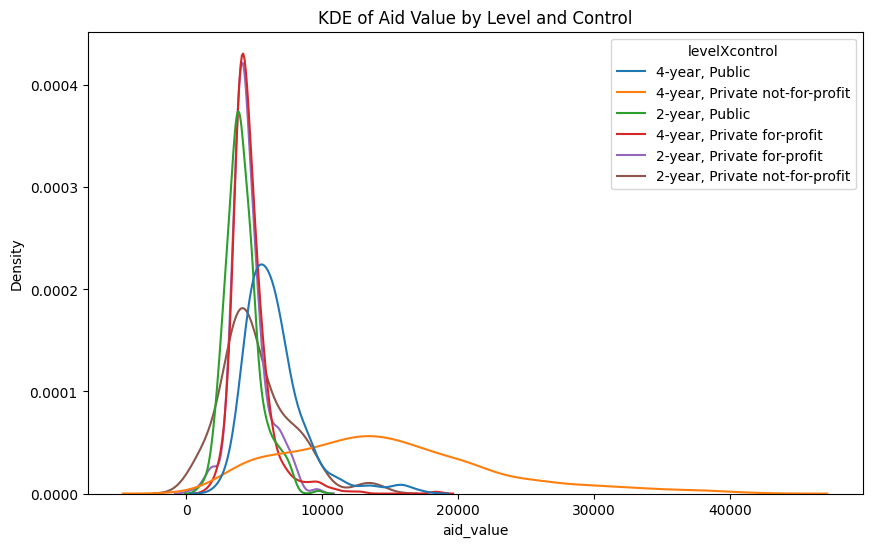

                                count          mean          std     min  \
control                level                                               
Private for-profit     2-year   464.0   4559.681034  1286.688269   294.0   
                       4-year   527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1180.0  14702.401695  7649.775203   902.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.

In [10]:
#7
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='aid_value', hue='levelXcontrol', common_norm=False)
plt.title("KDE of Aid Value by Level and Control")
plt.show()

print(df.groupby(['control','level'])['aid_value'].describe())

The student aid values are more concentrated among institutions, with only 4-year private not-for-profit institutions offering higher amount of aids to students.

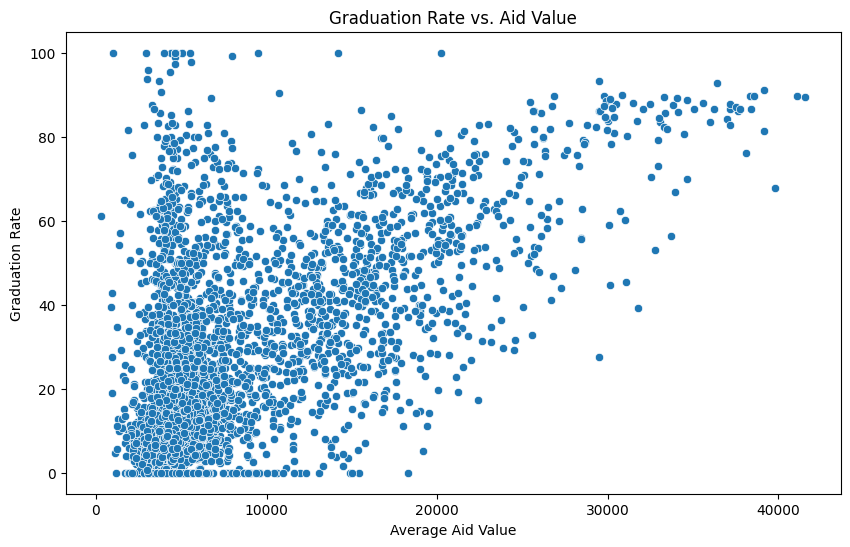

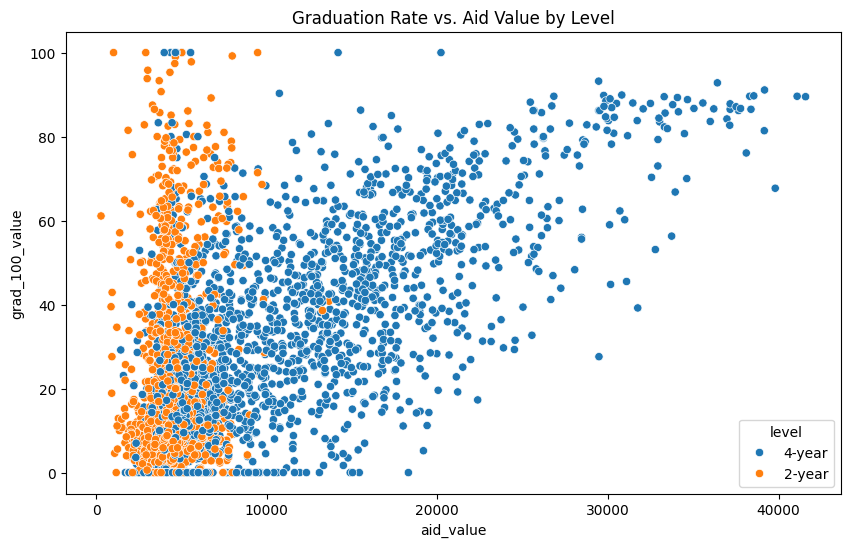

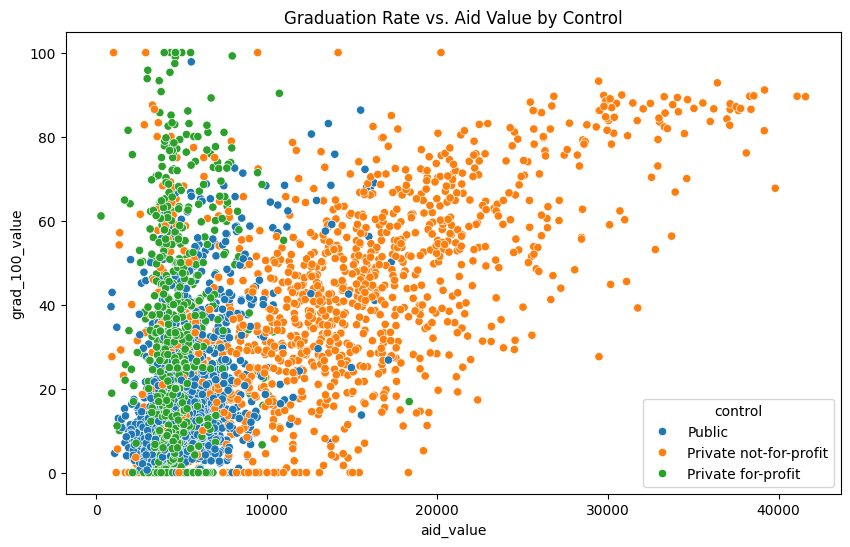

In [11]:
#8
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.title("Graduation Rate vs. Aid Value")
plt.xlabel("Average Aid Value")
plt.ylabel("Graduation Rate")
plt.show()

# Scatterplot grouped by level
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title("Graduation Rate vs. Aid Value by Level")
plt.show()

# Scatterplot grouped by control
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title("Graduation Rate vs. Aid Value by Control")
plt.show()

The first plot shows that increases in aid values overall leads to higher graduation rates. This relationship seems to be the strongest for 4-year public institutions, but still varying according to different types of institutions.

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.